- Step-0: Importing Libraries

In [18]:
import nltk,string,csv, re
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata,spacy
from sklearn.model_selection import train_test_split

In [8]:
# Download NLTK data 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aniket\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aniket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- Step 1: Reading the SMS Spam Collection dataset

In [9]:
df = pd.read_csv(
    'sms+spam+collection/SMSSpamCollection', 
    sep='\t', 
    names=['label', 'sms'],
    quoting=csv.QUOTE_NONE
)

In [10]:
# Displaying the first few records of the dataset
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- Step 2: Visualizing the distribution of 'ham' and 'spam' labels

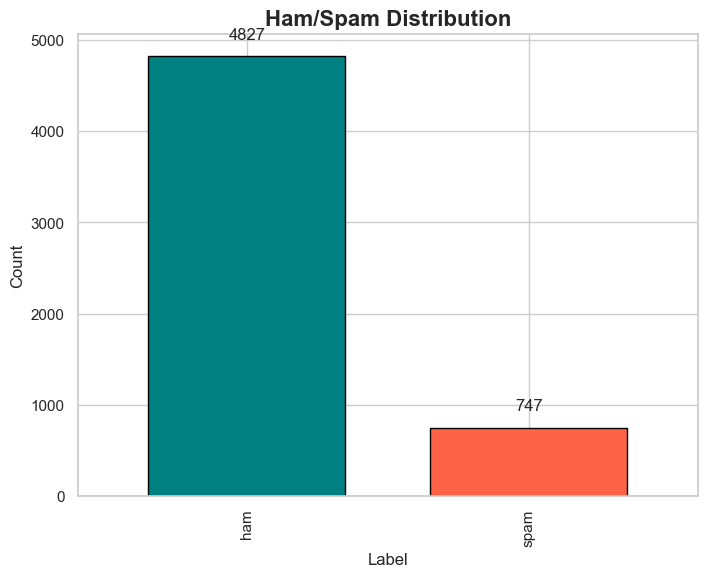

In [40]:
sns.set(style="whitegrid")

# Plot with custom colors and labels
plt.figure(figsize=(8, 6))
ax = df.label.value_counts().plot(kind='bar', color=['#008080', '#FF6347'], edgecolor='black', width=0.7)
plt.title('Ham/Spam Distribution', fontsize=16, weight='bold')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.show()

#### SMS Data preprocessing steps

The following steps are applied:  

1. **Convert to Lowercase**: Standardizes text to lowercase for uniform processing.  
2. **Remove Unicode Characters**: Normalizes text to remove any non-ASCII Unicode characters.  
3. **Remove Punctuation**: Eliminates special characters and symbols to focus on meaningful words.  
4. **Remove Non-Alphabetic Characters**: Retains only alphabetic words while removing numbers and other symbols.  
5. **Tokenization & Lemmatization**: Uses **SpaCy** to split text into tokens and reduce words to their base form.  
6. **Remove Stopwords**: Filters out common stopwords (e.g., *the, and, is*) to improve model efficiency.  

In [5]:
# Download and load Spacy model for lemmatization
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


- Step 3: Data Preprocessing 

In [11]:
def preprocess_text(sms):
    # Convert to lowercase
    sms = sms.lower()
    
    # Remove Unicode characters
    sms = unicodedata.normalize("NFKD", sms).encode("ascii", "ignore").decode("utf-8", "ignore")
    
    # Remove punctuation
    sms = sms.translate(str.maketrans("", "", string.punctuation))
    
    # Remove non-alphabetic characters (keeping spaces)
    sms = re.sub(r'[^a-zA-Z\s]', '', sms)
    
    # Tokenization and Lemmatization using Spacy
    doc = nlp(sms)
    words = [token.lemma_ for token in doc if token.lemma_ not in stopwords.words("english")]

    return ' '.join(words)

In [12]:
# Apply the preprocessing function to each SMS
df['processed_sms'] = df['sms'].map(preprocess_text)

In [13]:
# Displaying the first few processed records
df.head()

,label,sms,processed_sms
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts s...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah I think go usf live around though


- Step 4: Splitting the dataset into Training, Validation, and Test sets

In [14]:
train, temp = train_test_split(range(len(df)), stratify=df.label, test_size=0.25)  # Split into 75% train, 25% temp
valid, test = train_test_split(temp, stratify=df.iloc[temp, :].label, test_size=0.5)  # Split temp into 50% valid and 50% test

In [15]:
# Creating dataframes for train, validation, and test
train_df = df.iloc[train, :]
valid_df = df.iloc[valid, :]
test_df = df.iloc[test, :]

In [16]:
# Displaying the shapes of the datasets
train_df.shape, valid_df.shape, test_df.shape

((4180, 3), (697, 3), (697, 3))

- Step 5: Saving the datasets to CSV files

In [17]:
train_df.to_csv('sms+spam+collection/train.csv', index=False)
valid_df.to_csv('sms+spam+collection/valid.csv', index=False)
test_df.to_csv('sms+spam+collection/test.csv', index=False)